In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [12]:
df = pd.read_csv('Dataset.csv')

In [14]:
df.head()

,Age,Age-Group,Sex,Chest pain type,BP,BP-Group,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,Elderly,1,4,130,Pre-hypertension,322,0,2,109,0,2.4,2,3,3,Presence
1,80,Elderly,0,3,115,Normal,564,0,2,160,0,1.6,2,0,7,Absence
2,55,Middle-aged,1,2,124,Pre-hypertension,261,0,0,141,0,0.3,1,0,7,Presence
3,65,Elderly,1,4,128,Pre-hypertension,263,0,0,105,1,0.2,2,1,7,Absence
4,45,Middle-aged,0,2,120,Normal,269,0,2,121,1,0.2,1,1,3,Absence


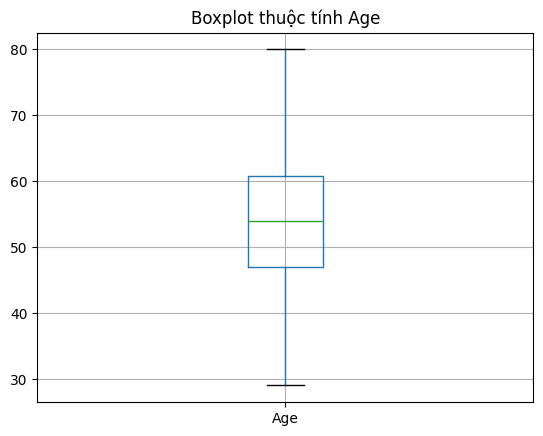

In [22]:
age_boxplot = df.boxplot(column="Age")
age_boxplot.set_title("Boxplot thuộc tính Age")
plt.show()

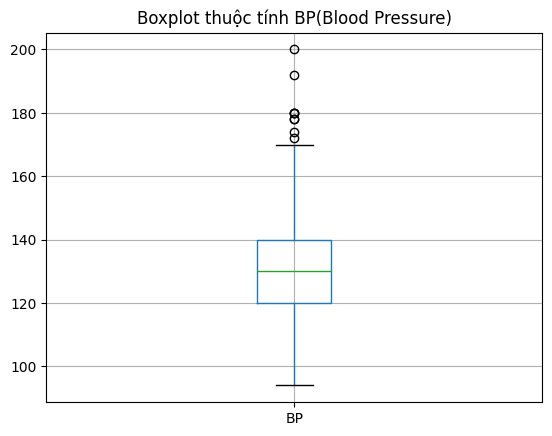

In [25]:
bp_boxplot = df.boxplot(column="BP")
bp_boxplot.set_title("Boxplot thuộc tính BP(Blood Pressure)")
plt.show()

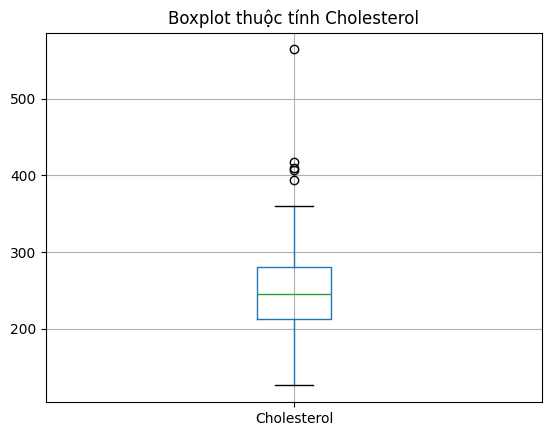

In [26]:
cholesterol_boxplot = df.boxplot(column="Cholesterol")
cholesterol_boxplot.set_title("Boxplot thuộc tính Cholesterol")
plt.show()

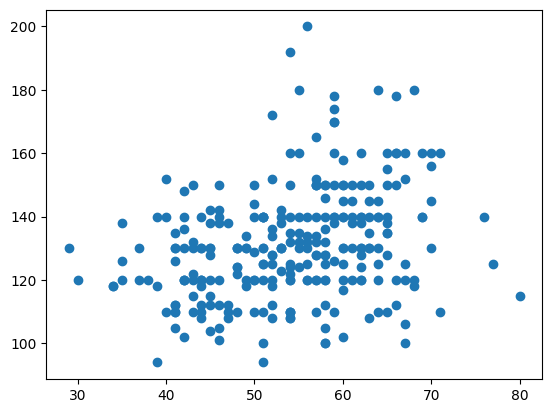

In [27]:
x = (df['Age'])
y = (df['BP'])
plt.scatter(x, y)
plt.show()

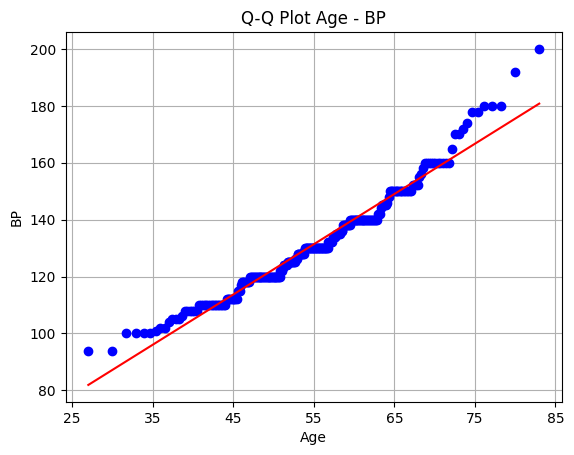

In [45]:
stats.probplot(df['BP'], dist="norm", plot=plt)
plt.title('Q-Q Plot Age - BP')
plt.grid(True)
plt.xticks(ticks=[-3, -2, -1, 0, 1, 2, 3], labels=[25, 35, 45, 55, 65, 75, 85])  
plt.xlabel("Age")
plt.ylabel("BP")
plt.show()

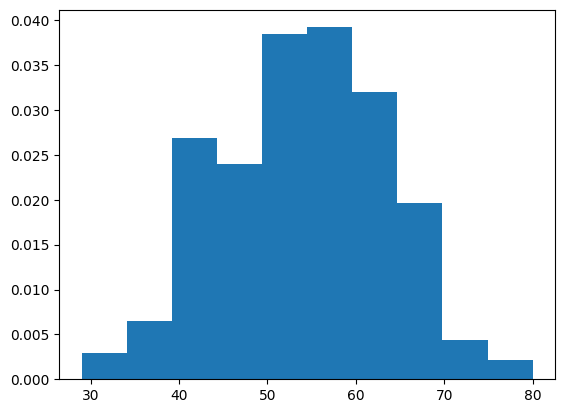

In [54]:
plt.hist(df['Age'], density=True)
plt.show()

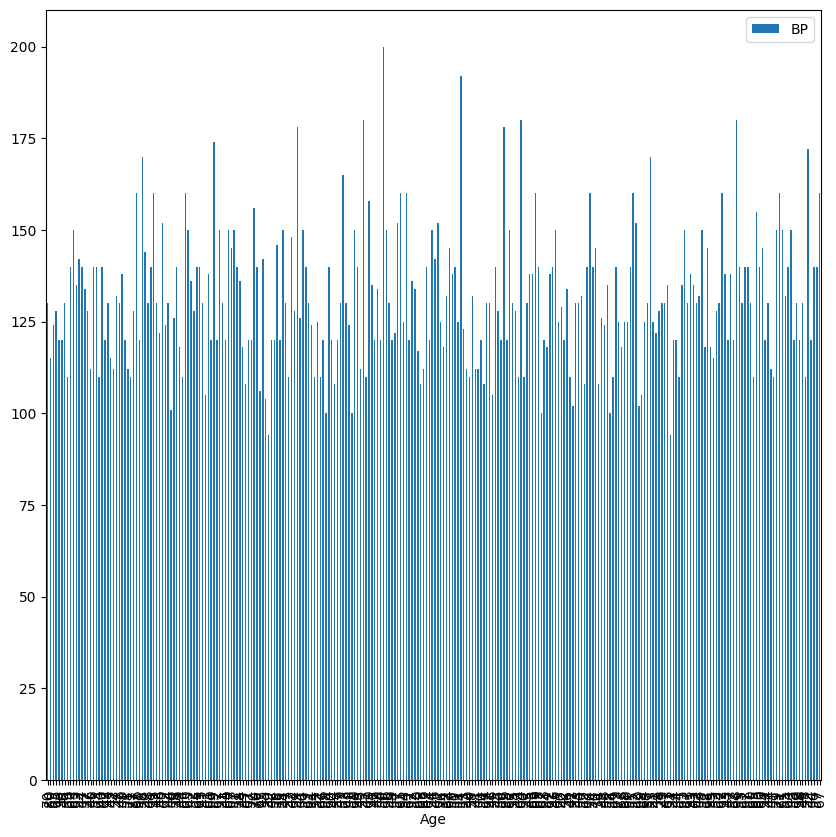

In [65]:
his = pd.DataFrame(df, columns=["Age", "BP"])
his.plot(x="Age", y="BP",kind="bar", figsize=(10, 10))
plt.show()

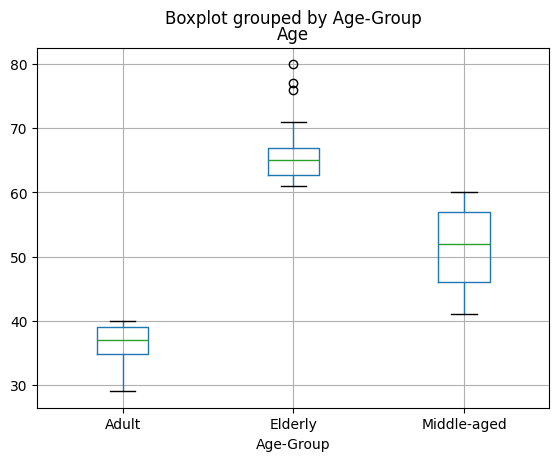

In [75]:
b_boxplot = df.boxplot(column="Age",by="Age-Group")
plt.show()

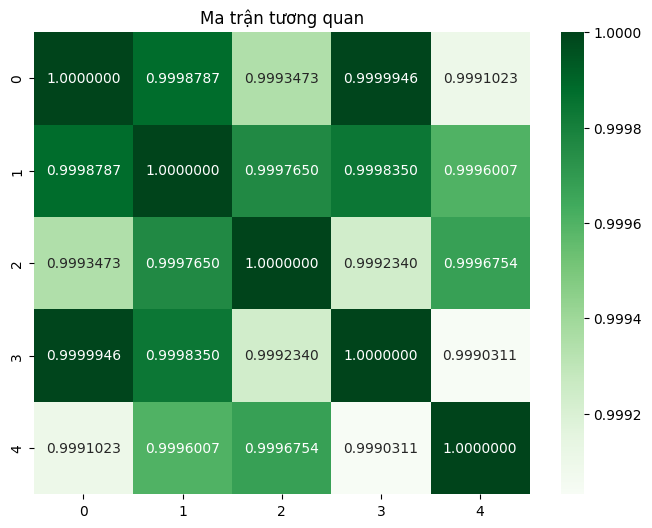

In [112]:
import seaborn as sns
data = pd.read_csv('Dataset.csv')
#Chọn 4 thuộc tính
ThuocTinh_Chon = ['Age','Age-Group','Sex','Chest pain type']
data = data[ThuocTinh_Chon]

#Chuyển giá trị Age-Group về số
data['Age-Group'] = data['Age-Group'].astype('category').cat.codes

#Lấy 5 dòng dữ liệu đầu tiên 
sub_data = data.head()

#Ma trận tương quan,T là đảo chiều cột sang dòng
correlation_matrix = sub_data.T.corr()

#In ra ma trận tương quan 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt="0.7f")
plt.title('Ma trận tương quan')
plt.show()

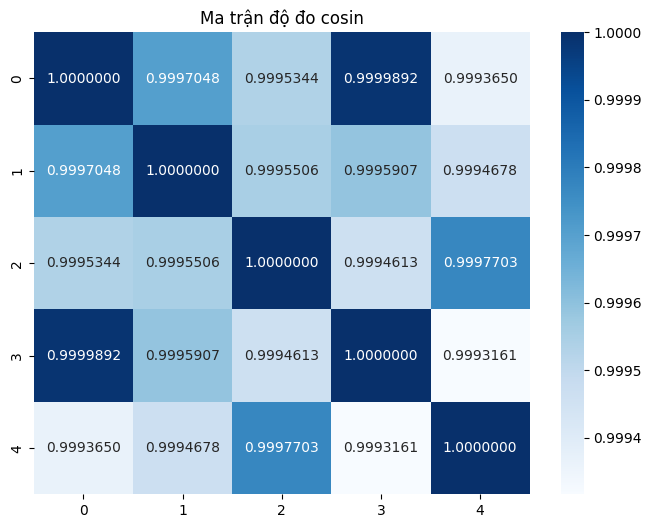

In [111]:
from sklearn.metrics.pairwise import cosine_similarity
# Tính toán ma trận độ đo cosin giữa các dòng
cosine_matrix = cosine_similarity(sub_data)
# Tạo DataFrame từ ma trận độ đo cosin
cosine_df = pd.DataFrame(cosine_matrix, index=sub_data.index, columns=sub_data.index)
# Tính toán ma trận độ đo cosin giữa các dòng
cosine_matrix = cosine_similarity(sub_data)
# Tạo DataFrame từ ma trận độ đo cosin
cosine_df = pd.DataFrame(cosine_matrix, index=sub_data.index, columns=sub_data.index)
# Vẽ ma trận độ đo cosin
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_df, annot=True, cmap='Blues', fmt=".7f")
plt.title('Ma trận độ đo cosin')
plt.show()

In [90]:
sub_data

,Age,Age-Group,Sex,Chest pain type
0,70,1,1,4
1,80,1,0,3
2,55,2,1,2
3,65,1,1,4
4,45,2,0,2


In [115]:
df.head()

,Age,Age-Group,Sex,Chest pain type,BP,BP-Group,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,Elderly,1,4,130,Pre-hypertension,322,0,2,109,0,2.4,2,3,3,Presence
1,80,Elderly,0,3,115,Normal,564,0,2,160,0,1.6,2,0,7,Absence
2,55,Middle-aged,1,2,124,Pre-hypertension,261,0,0,141,0,0.3,1,0,7,Presence
3,65,Elderly,1,4,128,Pre-hypertension,263,0,0,105,1,0.2,2,1,7,Absence
4,45,Middle-aged,0,2,120,Normal,269,0,2,121,1,0.2,1,1,3,Absence


In [144]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

dt = pd.read_csv('Dataset.csv')

#Chuyển giá trị cột Heart Disease thành số
def heart_disease(value):
    if value == 'Presence':
        return 1
    else:
        return 0    
dt['Heart_Disease'] = dt['Heart Disease'].apply(heart_disease) 

#Chọn thuộc tính
PL_data = dt[['Age-Group','BP-Group','FBS over 120','Number of vessels fluro','Heart_Disease']]

#Mã hoá nhãn của Age-Group và BP-Group
label_encoders = {}
for column in ['Age-Group', 'BP-Group']:
    le = LabelEncoder()
    dt[column] = le.fit_transform(dt[column])
    label_encoders[column] = le

#Chia cột kết quả riêng
X = dt[['Age-Group', 'BP-Group', 'FBS over 120', 'Number of vessels fluro']]
y = dt['Heart_Disease']

#Chia dữ liệu thành 2 tệp training và test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train phân loại Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

#input dữ liệu cần phân loại , sử dụng mã hoá nhãn ở trên
input_data = {
    'Age-Group': label_encoders['Age-Group'].transform(['Middle-aged'])[0],
    'BP-Group': label_encoders['BP-Group'].transform(['Hypertension'])[0],
    'FBS over 120': 1,
    'Number of vessels fluro': 1
}

#Chuyển input data thành DataFrame
input_dt = pd.DataFrame([input_data])

#Dự đoán kết quả
prediction = model.predict(input_dt)[0]

prediction

1

In [135]:
#Tính độ chính xác
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7592592592592593

In [138]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[25,  8],
       [ 5, 16]], dtype=int64)

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.67      0.76      0.71        21

    accuracy                           0.76        54
   macro avg       0.75      0.76      0.75        54
weighted avg       0.77      0.76      0.76        54

